<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/SVM_rbf_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#학습 데이터 만들기

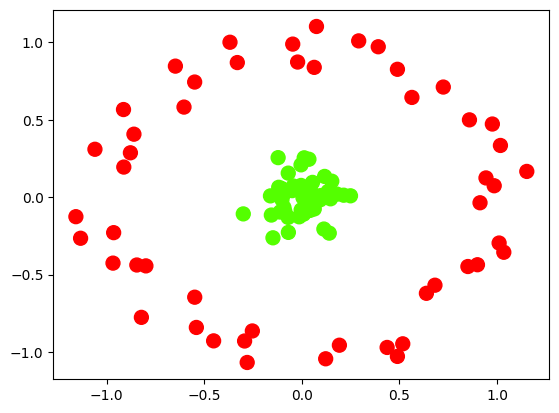

In [68]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='prism', vmax=1, vmin=0)

# sklearn SVM.SVC 불러오기
# 커널함수
* linear
* polynomial
* sigmoid (tanh)
* rbf (radial basis function): Gaussian

In [60]:
from sklearn.svm import SVC
clf = SVC(kernel='poly', gamma=4, coef0 = 1, degree = 3, C=1000.0)
# 학습
clf.fit(X, y)

SVC(C=1000.0, coef0=1, gamma=4, kernel='poly')

#서포트벡터 그리기

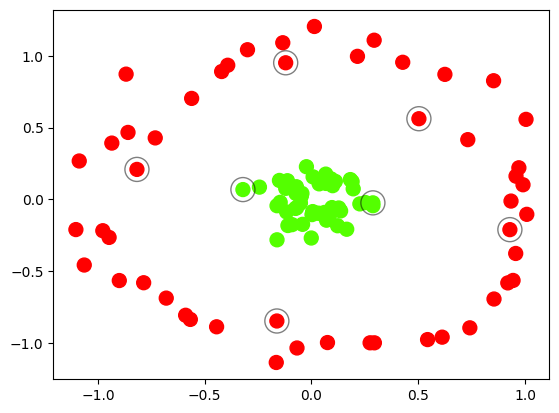

In [55]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='prism', vmax=1, vmin=0)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=300, edgecolors='k', facecolor='none', alpha=0.5);
plt.show()

#서포트벡터 리스트

In [56]:
clf.support_vectors_

array([[-0.16215537, -0.8474224 ],
       [-0.12081881,  0.95083829],
       [ 0.50317633,  0.56132175],
       [-0.81757538,  0.20826012],
       [ 0.92937829, -0.21125857],
       [ 0.28766433, -0.0246472 ],
       [-0.32115727,  0.06778945]])

# SVM으로 활용하기

In [61]:
# 새로운 데이터
X_t = np.array([0.7, 0.7])
X_t = X_t.reshape(1,-1)
y_t = clf.predict(X_t)
print(y_t)

[0]


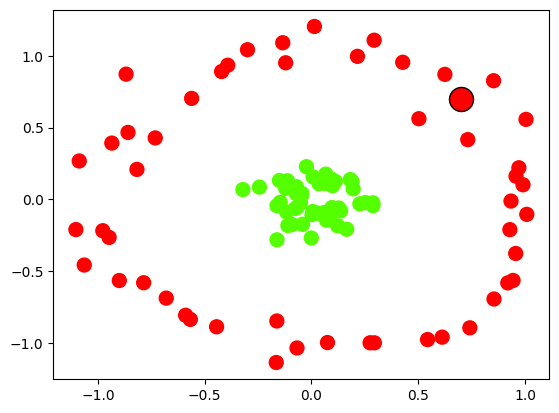

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='prism', vmax=1, vmin=0)
plt.scatter(X_t[0,0], X_t[0,1], c=y_t, edgecolors='k', s=300, cmap='prism', vmax=1, vmin=0)
#plt.show()

In [47]:
y

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])

(209, 216)


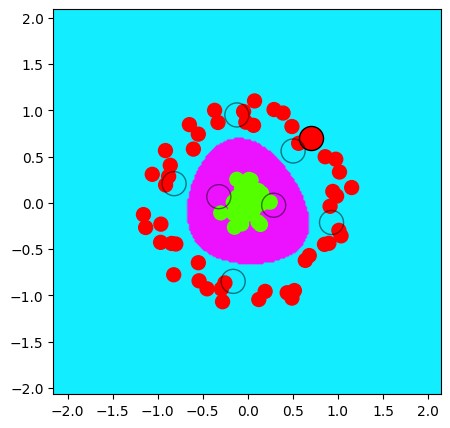

In [74]:
# 예상되는 데이터 영역을 h 크기의 메쉬형태로 구분
h = .02


# 결과를 비교하기 위해 두개 그림을 출력
fig, axs = plt.subplots(1,1, figsize=(5,5))


# 데이터의 최대, 최소 영역을 설정
x_min = X[:, 0].min() - 1
x_max = X[:, 0].max() + 1

y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # xx, yy array 크기 확인
print(xx.shape)

    # xx.ravel := xx.reshape(-1) --> 1차원 벡터로 평탄화
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Z를 다시 컨투어 가시과를 위해 메쉬 데이터로 복원
Z_out = Z.reshape(xx.shape)

    # fig[idx]= plt.figure(figsize=(8, 6))
axs.contourf(xx, yy, Z_out, cmap='cool')

# Plot also the training points
scatter = axs.scatter(x=X[:, 0], y=X[:, 1], cmap='cool', c=y,
                      alpha=1.0, edgecolor="black")


plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='prism', vmax=1, vmin=0)
plt.scatter(X_t[0,0], X_t[0,1], c=y_t, edgecolors='k', s=300, cmap='prism', vmax=1, vmin=0)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=300, edgecolors='k', facecolor='none', alpha=0.5);
plt.show()